<a href="https://colab.research.google.com/github/Sandag-Galbadrakh/RNN-ICEmaintainance/blob/main/PredectiveMaintainance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Сангууд дуудах
#Тоон боловсруулалтын сан
import numpy as np
#Хиймэл оюуны бүрдүүлэгч сан
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from scipy.interpolate import interp1d
#Хүснэгтэн мэдээлэлтэй ажиллах
import pandas as pd
#Гарфик зураглал
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt1
#Өгөгдөл боловсруулах normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
#Өгөгдөл унших
df = pd.read_csv('ML2.csv')
print(df.head()) #Эхний мөрүүдийг дэлгэцэнд хэвлэх

   mileage  Fe  Pb  Al  Cu   Cr  oil_changed  parts_measured
0        0   0   0   0   0  0.0            1               0
1       15   8   0   2   1  1.0            0               0
2       30   9   0   3   1  0.4            0               0
3       45  24   2   5   2  1.0            0               0
4       60  26   2   5   2  1.0            0               0


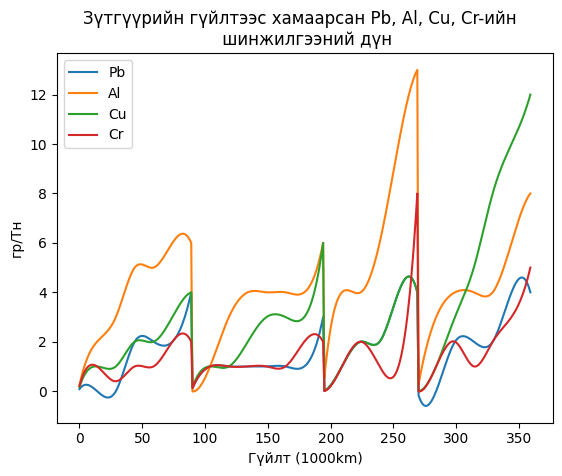

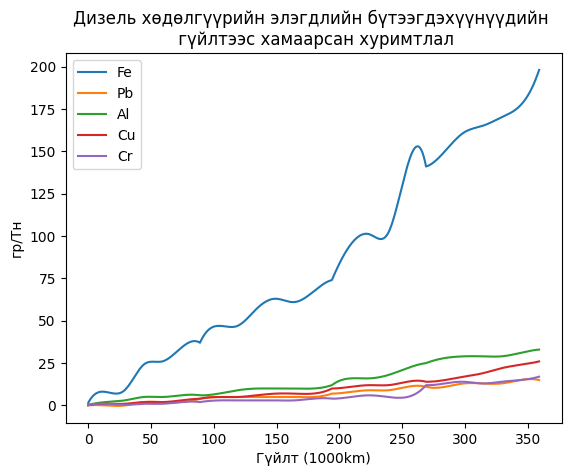

In [ ]:
#Урьдчилсан боловсруулалт хийх
mileage = df['mileage'].values
Fe = df['Fe'].values
Pb = df['Pb'].values
Al = df['Al'].values
Cu = df['Cu'].values
Cr = df['Cr'].values
#Элемент болгон 27 хэмжилтийн утгатай
oil_changed = df['oil_changed'].values
parts_measured = df['parts_measured'].values
#Тос сольсон цэгүүдийг ялгах
start_indices = np.where(oil_changed == 1)[0]
spx = np.split(mileage, start_indices[1:])
spFe = np.split(Fe, start_indices[1:])
spPb = np.split(Pb, start_indices[1:])
spAl = np.split(Al, start_indices[1:])
spCu = np.split(Cu, start_indices[1:])
spCr = np.split(Cr, start_indices[1:])
spOCh = np.split(oil_changed, start_indices[1:])
spPMe = np.split(parts_measured, start_indices[1:])

# Өгөгдөл аугмент хийх - куб интерполяц
interpx = []
interpFe = []
interpPb = []
interpAl = []
interpCu = []
interpCr = []
interpOCh = []
interpPMe = []

tinterpx = []
tinterpFe = []
tinterpPb = []
tinterpAl = []
tinterpCu = []
tinterpCr = []
tinterpOCh = []
tinterpPMe = []
# интерполяц хийж нийт 360 хэмжилтийн утгыг аугментлан (өгөгдлийн тоог олшруулах) боловсруулж
for i in range(len(spx)):
    newx = np.linspace(spx[i][0]+1, spx[i][-1], spx[i][-1]-spx[i][0])
    newFe = (interp1d(spx[i], spFe[i], kind="cubic"))(newx)
    newPb = (interp1d(spx[i], spPb[i], kind="cubic"))(newx)
    newAl = (interp1d(spx[i], spAl[i], kind="cubic"))(newx)
    newCu = (interp1d(spx[i], spCu[i], kind="cubic"))(newx)
    newCr = (interp1d(spx[i], spCr[i], kind="cubic"))(newx)
    newOCh = np.zeros_like(newx)
    newOCh[0] = 1
    newPMe = (interp1d(spx[i], spPMe[i], kind="cubic"))(newx)
    interpx.extend(newx)
    tinterpFe.extend(newFe)
    tinterpPb.extend(newPb)
    tinterpAl.extend(newAl)
    tinterpCu.extend(newCu)
    tinterpCr.extend(newCr)
    tinterpOCh.extend(newOCh)
    tinterpPMe.extend(newPMe)
    if i == 0:
      interpFe.extend(newFe)
      interpPb.extend(newPb)
      interpAl.extend(newAl)
      interpCu.extend(newCu)
      interpCr.extend(newCr)
    else:
      interpFe.extend(newFe+interpFe[-1])
      interpPb.extend(newPb+interpPb[-1])
      interpAl.extend(newAl+interpAl[-1])
      interpCu.extend(newCu+interpCu[-1])
      interpCr.extend(newCr+interpCr[-1])

# 2 тусдаа график дүрслэл гаргах

fig2, ax2 = plt.subplots()  # For the second plot
fig1, ax1 = plt.subplots()  # For the first plot

# Графикийн шошго бэлдэх
#ax2.plot(tinterpFe, label="Fe")
ax2.plot(tinterpPb, label="Pb")
ax2.plot(tinterpAl, label="Al")
ax2.plot(tinterpCu, label="Cu")
ax2.plot(tinterpCr, label="Cr")
ax2.legend(loc="upper left")
ax2.set_title("Зүтгүүрийн гүйлтээс хамаарсан Pb, Al, Cu, Cr-ийн  \n шинжилгээний дүн")
ax2.set_xlabel('Гүйлт (1000km)')
ax2.set_ylabel('гр/Тн')

# Графикийн шошго бэлдэх
ax1.plot(interpFe, label="Fe")
ax1.plot(interpPb, label="Pb")
ax1.plot(interpAl, label="Al")
ax1.plot(interpCu, label="Cu")
ax1.plot(interpCr, label="Cr")
ax1.legend(loc="upper left")
ax1.set_title("Дизель хөдөлгүүрийн элэгдлийн бүтээгдэхүүнүүдийн \n гүйлтээс хамаарсан хуримтлал")
ax1.set_xlabel('Гүйлт (1000km)')
ax1.set_ylabel('гр/Тн')


# Show both plots
plt.show()

In [ ]:
train_dates = pd.to_datetime(interpx)
interp = pd.DataFrame(interpFe)
cols = list(df)[1:2]
interp.columns = cols
interp
#Plumbum
Pbinterp = pd.DataFrame(interpPb)
Pbcols = list(df)[2:3]
Pbinterp.columns = Pbcols
Pbinterp
#Aluminum
Alinterp = pd.DataFrame(interpAl)
Alcols = list(df)[3:4]
Alinterp.columns = Alcols
Alinterp
#Cuprum
Cuinterp = pd.DataFrame(interpCu)
Cucols = list(df)[4:5]
Cuinterp.columns = Cucols
Cuinterp
#Chrome
Crinterp = pd.DataFrame(interpCr)
Crcols = list(df)[4:5]
Crinterp.columns = Crcols
Crinterp
df_for_training = interp[cols].astype(float)
df_for_trainingPb = Pbinterp[Pbcols].astype(float)
df_for_trainingAl = Alinterp[Alcols].astype(float)
df_for_trainingCu = Cuinterp[Cucols].astype(float)
df_for_trainingCr = Crinterp[Crcols].astype(float)
scaler = MinMaxScaler(feature_range=(0,1))
scalerPb = MinMaxScaler(feature_range=(0,1))
scalerAl = MinMaxScaler(feature_range=(0,1))
scalerCu = MinMaxScaler(feature_range=(0,1))
scalerCr = MinMaxScaler(feature_range=(0,1))

scaled = scaler.fit(df_for_training)
scaledPb = scalerPb.fit(df_for_trainingPb)
scaledAl = scalerAl.fit(df_for_trainingAl)
scaledCu = scalerCu.fit(df_for_trainingCu)
scaledCr = scalerCr.fit(df_for_trainingCr)

df_for_training_scaled = scaled.transform(df_for_training)
df_for_training_scaledPb = scaledPb.transform(df_for_trainingPb)
df_for_training_scaledAl = scaledAl.transform(df_for_trainingAl)
df_for_training_scaledCu = scaledCu.transform(df_for_trainingCu)
df_for_training_scaledCr = scaledCr.transform(df_for_trainingCr)
trainX = []
trainXPb = []
trainXAl = []
trainXCu = []
trainXCr = []

trainY = []
trainYPb = []
trainYAl = []
trainYCu = []
trainYCr = []

In [ ]:
import numpy as np
import pandas as pd

# Initialize lists for training data
trainX = []
trainXPb = []
trainXAl = []
trainXCu = []
trainXCr = []

trainY = []
trainYPb = []
trainYAl = []
trainYCu = []
trainYCr = []

n_past = 50  # Өнгөрсөн түүхэн өгөгдөл
n_future = 1  # Ирээдүйн 1 алхмыг таамаглах

# Prepare the data
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    # Prepare the input data
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainXPb.append(df_for_training_scaledPb[i - n_past:i, 0:df_for_trainingPb.shape[1]])
    trainXAl.append(df_for_training_scaledAl[i - n_past:i, 0:df_for_trainingAl.shape[1]])
    trainXCu.append(df_for_training_scaledCu[i - n_past:i, 0:df_for_trainingCu.shape[1]])
    trainXCr.append(df_for_training_scaledCr[i - n_past:i, 0:df_for_trainingCr.shape[1]])

    # Prepare the target data (future values)
    trainY.append(df_for_training_scaled[i:i + n_future, 0])
    trainYPb.append(df_for_training_scaledPb[i:i + n_future, 0])
    trainYAl.append(df_for_training_scaledAl[i:i + n_future, 0])
    trainYCu.append(df_for_training_scaledCu[i:i + n_future, 0])
    trainYCr.append(df_for_training_scaledCr[i:i + n_future, 0])

# Convert to numpy arrays
trainX = np.array(trainX)
trainXPb = np.array(trainXPb)
trainXAl = np.array(trainXAl)
trainXCu = np.array(trainXCu)
trainXCr = np.array(trainXCr)

trainY = np.array(trainY)
trainYPb = np.array(trainYPb)
trainYAl = np.array(trainYAl)
trainYCu = np.array(trainYCu)
trainYCr = np.array(trainYCr)

# Convert the numpy arrays to DataFrames and save to CSV
def save_combined_to_csv(trainX, trainY, prefix):
    # Reshape the data to 2D for saving as a CSV
    n_samples, n_timesteps, n_features = trainX.shape
    trainX_flattened = trainX.reshape((n_samples, n_timesteps * n_features))
    trainY_flattened = trainY.reshape((n_samples, n_future))

    # Combine trainX and trainY into a single DataFrame
    combined_df = pd.DataFrame(np.hstack((trainX_flattened, trainY_flattened)))

    # Save to CSV
    combined_df.to_csv(f'{prefix}_combined.csv', index=False)

# Save each dataset
save_combined_to_csv(trainX, trainY, 'dataset')
save_combined_to_csv(trainXPb, trainYPb, 'datasetPb')
save_combined_to_csv(trainXAl, trainYAl, 'datasetAl')
save_combined_to_csv(trainXCu, trainYCu, 'datasetCu')
save_combined_to_csv(trainXCr, trainYCr, 'datasetCr')


In [ ]:
n_past = 50 # Өнгөрсөн түүхэн өгөгдөл
n_future = 1   # Ирээдүйн 1 алхмыг таамаглах
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainXPb.append(df_for_training_scaledPb[i - n_past:i, 0:df_for_trainingPb.shape[1]])
    trainXAl.append(df_for_training_scaledAl[i - n_past:i, 0:df_for_trainingAl.shape[1]])
    trainXCu.append(df_for_training_scaledCu[i - n_past:i, 0:df_for_trainingCu.shape[1]])
    trainXCr.append(df_for_training_scaledCr[i - n_past:i, 0:df_for_trainingCr.shape[1]])

    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainYPb.append(df_for_training_scaledPb[i + n_future - 1:i + n_future, 0])
    trainYAl.append(df_for_training_scaledAl[i + n_future - 1:i + n_future, 0])
    trainYCu.append(df_for_training_scaledCu[i + n_future - 1:i + n_future, 0])
    trainYCr.append(df_for_training_scaledCr[i + n_future - 1:i + n_future, 0])

In [ ]:
trainXPb_2d = np.squeeze(trainXPb, axis=2)
#trainYPb_2d = np.squeeze(trainYPb, axis=2)
# Convert to pandas DataFrame
df = pd.DataFrame(trainXPb_2d)
df1 = pd.DataFrame(trainYPb)
# Display the DataFrame
print(df)
print(df1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)
trainXPb, trainXAl, trainXCu, trainXCr = np.array(trainXPb), np.array(trainXAl), np.array(trainXCu), np.array(trainXCr)
trainYPb, trainYAl, trainYCu, trainYCr = np.array(trainYPb), np.array(trainYAl), np.array(trainYCu), np.array(trainYCr)

print('trainX shape == {}.'.format(trainX.shape))
print('trainXPb shape == {}.'.format(trainXPb.shape))
print('trainXAl shape == {}.'.format(trainXAl.shape))
print('trainXCu shape == {}.'.format(trainXCu.shape))
print('trainXCr shape == {}.'.format(trainXCr.shape))
print('trainY shape == {}.'.format(trainY.shape))
print('trainYPb shape == {}.'.format(trainYPb.shape))
print('trainYAl shape == {}.'.format(trainYAl.shape))
print('trainYCu shape == {}.'.format(trainYCu.shape))
print('trainYCr shape == {}.'.format(trainYCr.shape))

trainX shape == (310, 50, 1).
trainXPb shape == (310, 50, 1).
trainXAl shape == (310, 50, 1).
trainXCu shape == (310, 50, 1).
trainXCr shape == (310, 50, 1).
trainY shape == (310, 1).
trainYPb shape == (310, 1).
trainYAl shape == (310, 1).
trainYCu shape == (310, 1).
trainYCr shape == (310, 1).


In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

model_Pb = Sequential()
model_Pb.add(LSTM(32, input_shape=(trainXPb.shape[1], trainXPb.shape[2]), return_sequences=True))
model_Pb.add(LSTM(32, activation='relu', return_sequences=False))
model_Pb.add(Dense(trainYPb.shape[1]))  # Output layer with 1 neuron (for regression)
model_Pb.compile(optimizer='adam', loss='mse')
model_Pb.summary()

model_Al = Sequential()
model_Al.add(LSTM(32, input_shape=(trainXAl.shape[1], trainXAl.shape[2]), return_sequences=True))
model_Al.add(LSTM(32, activation='relu', return_sequences=False))
model_Al.add(Dense(trainYAl.shape[1]))  # Output layer with 1 neuron (for regression)
model_Al.compile(optimizer='adam', loss='mse')
model_Al.summary()

# Create a model for trainXCu
model_Cu = Sequential()
model_Cu.add(LSTM(32, input_shape=(trainXCu.shape[1], trainXCu.shape[2]), return_sequences=True))
model_Cu.add(LSTM(32, activation='relu', return_sequences=False))
model_Cu.add(Dense(trainYCu.shape[1]))
model_Cu.compile(optimizer='adam', loss='mse')
model_Cu.summary()

# Create a model for trainXCr
model_Cr = Sequential()
model_Cr.add(LSTM(32, input_shape=(trainXCr.shape[1], trainXCr.shape[2]), return_sequences=True))
model_Cr.add(LSTM(32, activation='relu', return_sequences=False))
model_Cr.add(Dense(trainYCr.shape[1]))
model_Cr.compile(optimizer='adam', loss='mse')
model_Cr.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 50, 32)            4352      
                                                                 
 lstm_61 (LSTM)              (None, 32)                8320      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 50, 32)            4352      
                                                            

Epoch 1/20
5/5 - 5s - loss: 0.2735 - val_loss: 0.7277 - 5s/epoch - 966ms/step
Epoch 2/20
5/5 - 0s - loss: 0.2071 - val_loss: 0.5278 - 230ms/epoch - 46ms/step
Epoch 3/20
5/5 - 0s - loss: 0.1339 - val_loss: 0.2801 - 221ms/epoch - 44ms/step
Epoch 4/20
5/5 - 0s - loss: 0.0516 - val_loss: 0.0151 - 220ms/epoch - 44ms/step
Epoch 5/20
5/5 - 0s - loss: 0.0130 - val_loss: 0.0200 - 245ms/epoch - 49ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0113 - val_loss: 0.0197 - 219ms/epoch - 44ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0070 - val_loss: 0.0464 - 249ms/epoch - 50ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0083 - val_loss: 0.0170 - 222ms/epoch - 44ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0031 - val_loss: 3.7980e-04 - 214ms/epoch - 43ms/step
Epoch 10/20
5/5 - 0s - loss: 0.0035 - val_loss: 0.0012 - 250ms/epoch - 50ms/step
Epoch 11/20
5/5 - 0s - loss: 0.0020 - val_loss: 0.0069 - 236ms/epoch - 47ms/step
Epoch 12/20
5/5 - 0s - loss: 0.0018 - val_loss: 8.9937e-04 - 214ms/epoch - 43ms/step
Epoch 13/20
5/5 - 0s - loss: 0.

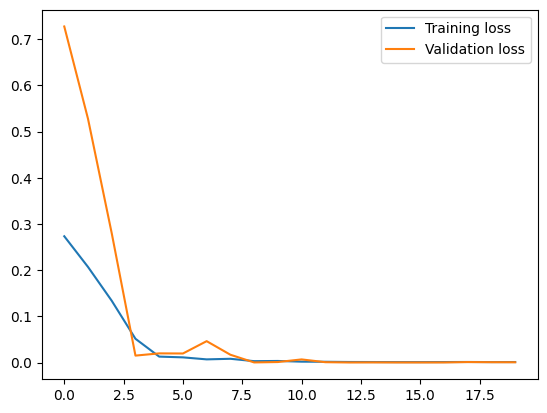

In [ ]:
# Сургалтын процессийг эхлүүлэх

history = model.fit(trainX, trainY, epochs=20, batch_size=72, validation_split=0.05, verbose=2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/20
5/5 - 5s - loss: 0.2831 - val_loss: 0.6578 - 5s/epoch - 1s/step
Epoch 2/20
5/5 - 0s - loss: 0.1624 - val_loss: 0.2723 - 371ms/epoch - 74ms/step
Epoch 3/20
5/5 - 0s - loss: 0.0405 - val_loss: 0.1253 - 372ms/epoch - 74ms/step
Epoch 4/20
5/5 - 0s - loss: 0.0256 - val_loss: 0.0020 - 384ms/epoch - 77ms/step
Epoch 5/20
5/5 - 0s - loss: 0.0032 - val_loss: 0.0347 - 313ms/epoch - 63ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0089 - val_loss: 0.0268 - 219ms/epoch - 44ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0043 - val_loss: 0.0033 - 226ms/epoch - 45ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0024 - val_loss: 0.0020 - 229ms/epoch - 46ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0033 - val_loss: 0.0011 - 221ms/epoch - 44ms/step
Epoch 10/20
5/5 - 0s - loss: 0.0020 - val_loss: 0.0064 - 223ms/epoch - 45ms/step
Epoch 11/20
5/5 - 0s - loss: 0.0023 - val_loss: 0.0050 - 211ms/epoch - 42ms/step
Epoch 12/20
5/5 - 0s - loss: 0.0018 - val_loss: 0.0012 - 250ms/epoch - 50ms/step
Epoch 13/20
5/5 - 0s - loss: 0.0017 - val_

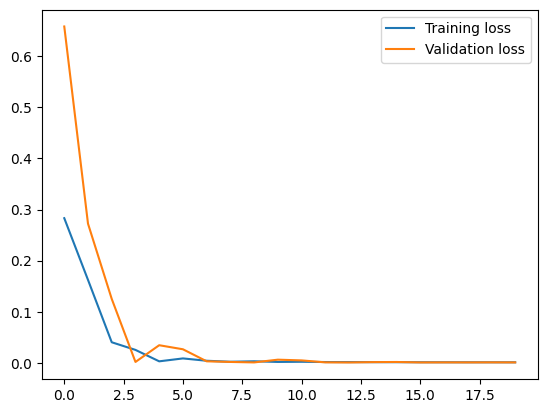

In [ ]:
historyPb = model_Pb.fit(trainXPb, trainYPb, epochs=20, batch_size=72, validation_split=0.05, verbose=2)
plt.plot(historyPb.history['loss'], label='Training loss')
plt.plot(historyPb.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/20
5/5 - 4s - loss: 0.2655 - val_loss: 0.4695 - 4s/epoch - 879ms/step
Epoch 2/20
5/5 - 0s - loss: 0.1068 - val_loss: 0.1307 - 214ms/epoch - 43ms/step
Epoch 3/20
5/5 - 0s - loss: 0.0172 - val_loss: 0.0155 - 222ms/epoch - 44ms/step
Epoch 4/20
5/5 - 0s - loss: 0.0176 - val_loss: 0.0321 - 208ms/epoch - 42ms/step
Epoch 5/20
5/5 - 0s - loss: 0.0074 - val_loss: 0.0042 - 222ms/epoch - 44ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0039 - val_loss: 0.0244 - 225ms/epoch - 45ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0059 - val_loss: 0.0137 - 214ms/epoch - 43ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0028 - val_loss: 9.3171e-04 - 212ms/epoch - 42ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0020 - val_loss: 9.0429e-04 - 222ms/epoch - 44ms/step
Epoch 10/20
5/5 - 0s - loss: 0.0025 - val_loss: 9.7444e-06 - 223ms/epoch - 45ms/step
Epoch 11/20
5/5 - 0s - loss: 0.0014 - val_loss: 0.0023 - 217ms/epoch - 43ms/step
Epoch 12/20
5/5 - 0s - loss: 0.0015 - val_loss: 0.0025 - 214ms/epoch - 43ms/step
Epoch 13/20
5/5 - 0s - loss

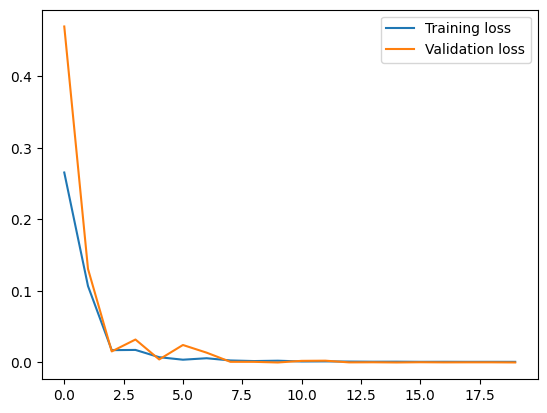

In [ ]:
historyAl = model_Al.fit(trainXAl, trainYAl, epochs=20, batch_size=72, validation_split=0.05, verbose=2)
plt.plot(historyAl.history['loss'], label='Training loss')
plt.plot(historyAl.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/20
5/5 - 5s - loss: 0.1817 - val_loss: 0.6645 - 5s/epoch - 1s/step
Epoch 2/20
5/5 - 0s - loss: 0.1274 - val_loss: 0.4544 - 209ms/epoch - 42ms/step
Epoch 3/20
5/5 - 0s - loss: 0.0745 - val_loss: 0.1703 - 211ms/epoch - 42ms/step
Epoch 4/20
5/5 - 0s - loss: 0.0150 - val_loss: 0.0192 - 212ms/epoch - 42ms/step
Epoch 5/20
5/5 - 0s - loss: 0.0155 - val_loss: 0.0042 - 235ms/epoch - 47ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0043 - val_loss: 0.0302 - 204ms/epoch - 41ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0068 - val_loss: 0.0275 - 223ms/epoch - 45ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0041 - val_loss: 3.0232e-04 - 212ms/epoch - 42ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0029 - val_loss: 0.0031 - 222ms/epoch - 44ms/step
Epoch 10/20
5/5 - 0s - loss: 0.0025 - val_loss: 7.9321e-05 - 220ms/epoch - 44ms/step
Epoch 11/20
5/5 - 0s - loss: 0.0016 - val_loss: 0.0015 - 213ms/epoch - 43ms/step
Epoch 12/20
5/5 - 0s - loss: 0.0015 - val_loss: 1.8574e-04 - 213ms/epoch - 43ms/step
Epoch 13/20
5/5 - 0s - loss: 9

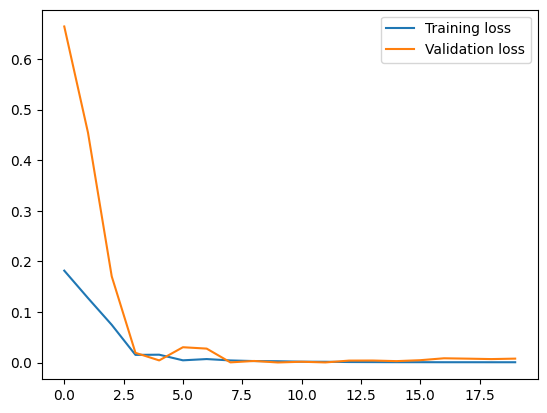

In [ ]:
historyCu = model_Cu.fit(trainXCu, trainYCu, epochs=20, batch_size=72, validation_split=0.05, verbose=2)
plt.plot(historyCu.history['loss'], label='Training loss')
plt.plot(historyCu.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/20
5/5 - 4s - loss: 0.1244 - val_loss: 0.3245 - 4s/epoch - 823ms/step
Epoch 2/20
5/5 - 0s - loss: 0.0439 - val_loss: 0.0259 - 205ms/epoch - 41ms/step
Epoch 3/20
5/5 - 0s - loss: 0.0124 - val_loss: 0.0199 - 210ms/epoch - 42ms/step
Epoch 4/20
5/5 - 0s - loss: 0.0158 - val_loss: 0.0070 - 211ms/epoch - 42ms/step
Epoch 5/20
5/5 - 0s - loss: 0.0065 - val_loss: 0.0359 - 212ms/epoch - 42ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0083 - val_loss: 0.0257 - 222ms/epoch - 44ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0053 - val_loss: 0.0021 - 224ms/epoch - 45ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0042 - val_loss: 0.0018 - 210ms/epoch - 42ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0043 - val_loss: 6.2188e-04 - 225ms/epoch - 45ms/step
Epoch 10/20
5/5 - 0s - loss: 0.0033 - val_loss: 0.0066 - 224ms/epoch - 45ms/step
Epoch 11/20
5/5 - 0s - loss: 0.0037 - val_loss: 0.0023 - 209ms/epoch - 42ms/step
Epoch 12/20
5/5 - 0s - loss: 0.0030 - val_loss: 6.9277e-04 - 217ms/epoch - 43ms/step
Epoch 13/20
5/5 - 0s - loss: 0.

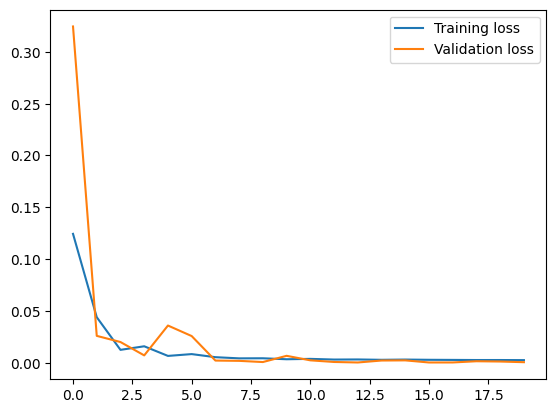

In [ ]:
historyCr = model_Cr.fit(trainXCr, trainYCr, epochs=20, batch_size=72, validation_split=0.05, verbose=2)
plt.plot(historyCr.history['loss'], label='Training loss')
plt.plot(historyCr.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
y_pred_futureA = []
for i in range(len(trainX)):
  if i > 150:
    forecast = model.predict(trainX[i:i+1])
    y_pred_future = scaled.inverse_transform(forecast)[:,0]
    y_pred_futureA.append(y_pred_future)
y_pred_futureA_floats = [item[0] for item in y_pred_futureA]
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
real = np.array(interpFe[200:359])
predicted = np.array(y_pred_futureA_floats)
r2 = r2_score(real, predicted)
print(f"R-squared (R²): {r2}")

traindatesx_interpFe = range(len(interpFe))
sns.lineplot(x=traindatesx_interpFe, y=interpFe, label='Бодит хэмжилт')
sns.lineplot(x=traindatesx_interpFe[200:359], y=y_pred_futureA_floats, label='Таамагласан үр дүн')
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Fe, гр/тн')
plt.title('Ажилласан тосонд хуримтлагдах \n төмрийн агууламжийн бодит хэмжилт болон \n таамагласан үр дүнгийн харьцуулалт (Fe)')
#plt.axhline(y=250, color='r', linestyle='--')
plt.show()

In [ ]:
y_pred_futureA = []
for i in range(len(trainXPb)):
  if i > 150:
    forecast = model.predict(trainXPb[i:i+1])
    y_pred_future = scaledPb.inverse_transform(forecast)[:,0]
    y_pred_futureA.append(y_pred_future)
y_pred_futureA_floats = [item[0] for item in y_pred_futureA]
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
real = np.array(interpPb[200:359])
predicted = np.array(y_pred_futureA_floats)
r2 = r2_score(real, predicted)
print(f"R-squared (R²): {r2}")

traindatesx_interpPb = range(len(interpPb))
sns.lineplot(x=traindatesx_interpPb, y=interpPb, label='Бодит хэмжилт')
sns.lineplot(x=traindatesx_interpPb[200:359], y=y_pred_futureA_floats, label='Таамагласан үр дүн')
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Pb, гр/тн')
plt.title('Ажилласан тосонд хуримтлагдах \n хар тугалгын агууламжийн бодит хэмжилт болон \n таамагласан үр дүнгийн харьцуулалт (Pb)')
plt.show()

In [ ]:
y_pred_futureA = []
for i in range(len(trainXAl)):
  if i > 150:
    forecast = model.predict(trainXAl[i:i+1])
    y_pred_future = scaledAl.inverse_transform(forecast)[:,0]
    y_pred_futureA.append(y_pred_future)
y_pred_futureA_floats = [item[0] for item in y_pred_futureA]
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
real = np.array(interpAl[200:359])
predicted = np.array(y_pred_futureA_floats)
r2 = r2_score(real, predicted)
print(f"R-squared (R²): {r2}")

traindatesx_interpAl = range(len(interpAl))
sns.lineplot(x=traindatesx_interpAl, y=interpAl, label='Бодит хэмжилт')
sns.lineplot(x=traindatesx_interpAl[200:359], y=y_pred_futureA_floats, label='Таамагласан үр дүн')
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Al, гр/тн')
plt.title('Ажилласан тосонд хуримтлагдах \n хөнгөн цагааны агууламжийн бодит хэмжилт болон \n таамагласан үр дүнгийн харьцуулалт (Al)')
plt.show()

In [ ]:
y_pred_futureA = []
for i in range(len(trainXCu)):
  if i > 150:
    forecast = model.predict(trainXCu[i:i+1])
    y_pred_future = scaledCu.inverse_transform(forecast)[:,0]
    y_pred_futureA.append(y_pred_future)
y_pred_futureA_floats = [item[0] for item in y_pred_futureA]
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
real = np.array(interpCu[200:359])
predicted = np.array(y_pred_futureA_floats)
r2 = r2_score(real, predicted)
print(f"R-squared (R²): {r2}")

traindatesx_interpCu = range(len(interpCu))
sns.lineplot(x=traindatesx_interpCu, y=interpCu, label='Бодит хэмжилт')
sns.lineplot(x=traindatesx_interpCu[200:359], y=y_pred_futureA_floats, label='Таамагласан үр дүн')
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Cu, гр/тн')
plt.title('Ажилласан тосонд хуримтлагдах \n зэсийн агууламжийн бодит хэмжилт болон \n таамагласан үр дүнгийн харьцуулалт (Cu)')
plt.show()

In [ ]:
y_pred_futureA = []
for i in range(len(trainXCr)):
  if i > 150:
    forecast = model.predict(trainXCr[i:i+1])
    y_pred_future = scaledCr.inverse_transform(forecast)[:,0]
    y_pred_futureA.append(y_pred_future)
y_pred_futureA_floats = [item[0] for item in y_pred_futureA]
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
real = np.array(interpCr[200:359])
predicted = np.array(y_pred_futureA_floats)
r2 = r2_score(real, predicted)
print(f"R-squared (R²): {r2}")

traindatesx_interpCr = range(len(interpCr))
sns.lineplot(x=traindatesx_interpCr, y=interpCr, label='Бодит хэмжилт')
sns.lineplot(x=traindatesx_interpCr[200:359], y=y_pred_futureA_floats, label='Таамагласан үр дүн')
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Cr, гр/тн')
plt.title('Ажилласан тосонд хуримтлагдах \n хромын агууламжийн бодит хэмжилт болон \n таамагласан үр дүнгийн харьцуулалт (Cr)')
plt.show()

10/10 [==============================] - 0s 13ms/step


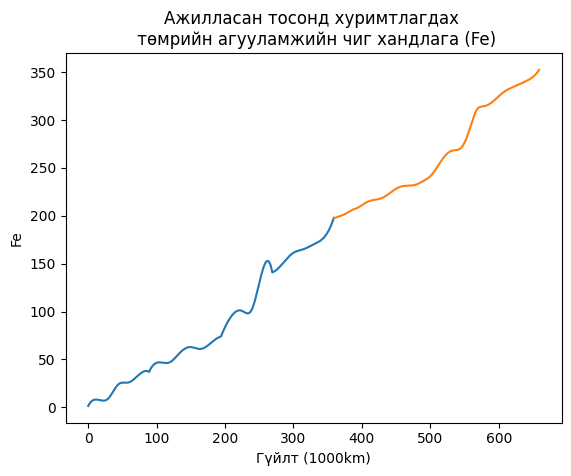

In [ ]:
#Fe forecast
# Таамаглал эхлүүлэх, 300 удаа ажиллуулан 360,000км-ийн өгөгдлөөс цааш 300,000км-ийн элэгдлийн бүтээгдэхүүний хэмжээг таамаглах
n_future = 300
forecast_period_dates = pd.date_range(list(train_dates[:200])[-1], periods=n_future, freq='1ns').tolist()

forecast = model.predict(trainX[-n_future:])
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=1)
y_pred_future = scaled.inverse_transform(forecast_copies)[:,0]
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'mileage':np.array(forecast_dates), 'Fe': y_pred_future})
df_forecast['mileage']=pd.date_range(list(train_dates)[-1], periods=n_future, freq='1ns').tolist()
delta = interpFe[-1] - df_forecast['Fe'][1]
df_forecast['Fe'] += delta
traindatesx = np.linspace(0, len(train_dates)-1, len(train_dates))
df_forecastsx = np.linspace(len(train_dates), len(train_dates)+len(df_forecast)-1, len(df_forecast))

sns.lineplot(x = traindatesx, y = interpFe)
sns.lineplot(x = df_forecastsx, y = df_forecast['Fe'])
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Fe')
plt.title('Ажилласан тосонд хуримтлагдах \n төмрийн агууламжийн чиг хандлага (Fe)')
#plt.axhline(y=250, color='r', linestyle='--')
plt.show()

10/10 [==============================] - 1s 15ms/step
15.0
2.668512


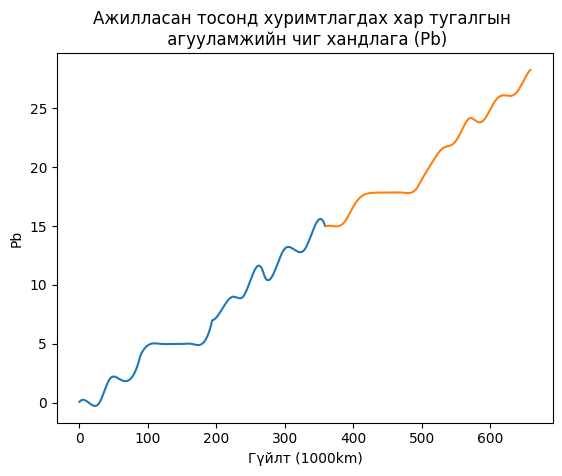

In [ ]:
#Pb forecast
forecast = model_Pb.predict(trainXPb[-n_future:])
forecast_copies = np.repeat(forecast, df_for_trainingPb.shape[1], axis=1)
y_pred_future = scaledPb.inverse_transform(forecast_copies)[:,0]
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'mileage':np.array(forecast_dates), 'Pb': y_pred_future})
df_forecast['mileage']=pd.date_range(list(train_dates)[-1], periods=n_future, freq='1ns').tolist()
print(interpPb[-1])
print(df_forecast['Pb'][1])

delta = interpPb[-1] - df_forecast['Pb'][1]
df_forecast['Pb'] += delta

traindatesx = np.linspace(0, len(train_dates)-1, len(train_dates))
df_forecastsx = np.linspace(len(train_dates), len(train_dates)+len(df_forecast)-1, len(df_forecast))

sns.lineplot(x = traindatesx, y = interpPb)
sns.lineplot(x = df_forecastsx, y = df_forecast['Pb'])
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Pb')
plt.title('Ажилласан тосонд хуримтлагдах хар тугалгын \n агууламжийн чиг хандлага (Pb)')
#plt.axhline(y=250, color='r', linestyle='--')
plt.show()

10/10 [==============================] - 1s 11ms/step
33.0
5.8187275


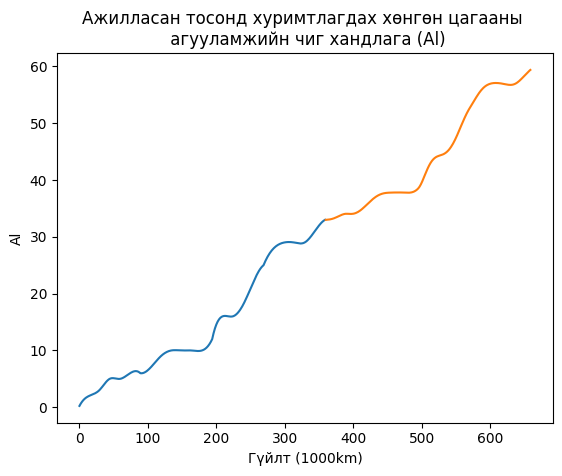

In [ ]:
#Al forecast
forecast = model_Al.predict(trainXAl[-n_future:])
forecast_copies = np.repeat(forecast, df_for_trainingAl.shape[1], axis=1)
y_pred_future = scaledAl.inverse_transform(forecast_copies)[:,0]
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'mileage':np.array(forecast_dates), 'Al': y_pred_future})
df_forecast['mileage']=pd.date_range(list(train_dates)[-1], periods=n_future, freq='1ns').tolist()
print(interpAl[-1])
print(df_forecast['Al'][1])

delta = interpAl[-1] - df_forecast['Al'][1]
df_forecast['Al'] += delta

traindatesx = np.linspace(0, len(train_dates)-1, len(train_dates))
df_forecastsx = np.linspace(len(train_dates), len(train_dates)+len(df_forecast)-1, len(df_forecast))

sns.lineplot(x = traindatesx, y = interpAl)
sns.lineplot(x = df_forecastsx, y = df_forecast['Al'])
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Al')
plt.title('Ажилласан тосонд хуримтлагдах хөнгөн цагааны \n агууламжийн чиг хандлага (Al)')
#plt.axhline(y=250, color='r', linestyle='--')
plt.show()

10/10 [==============================] - 1s 13ms/step
26.0
2.3126607


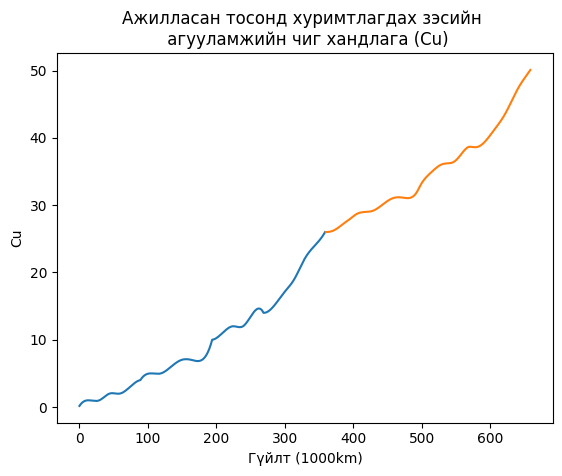

In [ ]:
#Cu forecast
forecast = model_Cu.predict(trainXCu[-n_future:])
forecast_copies = np.repeat(forecast, df_for_trainingCu.shape[1], axis=1)
y_pred_future = scaledCu.inverse_transform(forecast_copies)[:,0]
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'mileage':np.array(forecast_dates), 'Cu': y_pred_future})
df_forecast['mileage']=pd.date_range(list(train_dates)[-1], periods=n_future, freq='1ns').tolist()
print(interpCu[-1])
print(df_forecast['Cu'][1])

delta = interpCu[-1] - df_forecast['Cu'][1]
df_forecast['Cu'] += delta

traindatesx = np.linspace(0, len(train_dates)-1, len(train_dates))
df_forecastsx = np.linspace(len(train_dates), len(train_dates)+len(df_forecast)-1, len(df_forecast))

sns.lineplot(x = traindatesx, y = interpCu)
sns.lineplot(x = df_forecastsx, y = df_forecast['Cu'])
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Cu')
plt.title('Ажилласан тосонд хуримтлагдах зэсийн \n агууламжийн чиг хандлага (Cu)')
#plt.axhline(y=250, color='r', linestyle='--')
plt.show()

10/10 [==============================] - 1s 11ms/step
17.0
1.0839882


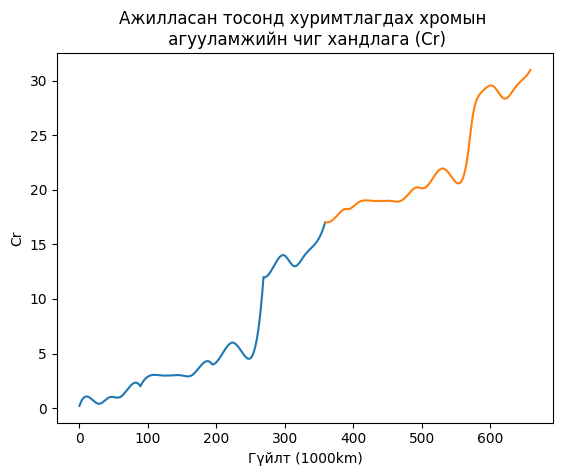

In [ ]:
#Cr forecast
forecast = model_Cr.predict(trainXCr[-n_future:])
forecast_copies = np.repeat(forecast, df_for_trainingCr.shape[1], axis=1)
y_pred_future = scaledCr.inverse_transform(forecast_copies)[:,0]
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'mileage':np.array(forecast_dates), 'Cr': y_pred_future})
df_forecast['mileage']=pd.date_range(list(train_dates)[-1], periods=n_future, freq='1ns').tolist()
print(interpCr[-1])
print(df_forecast['Cr'][1])

delta = interpCr[-1] - df_forecast['Cr'][1]
df_forecast['Cr'] += delta

traindatesx = np.linspace(0, len(train_dates)-1, len(train_dates))
df_forecastsx = np.linspace(len(train_dates), len(train_dates)+len(df_forecast)-1, len(df_forecast))

sns.lineplot(x = traindatesx, y = interpCr)
sns.lineplot(x = df_forecastsx, y = df_forecast['Cr'])
plt.xlabel('Гүйлт (1000km)')
plt.ylabel('Cr')
plt.title('Ажилласан тосонд хуримтлагдах хромын \n агууламжийн чиг хандлага (Cr)')
#plt.axhline(y=250, color='r', linestyle='--')
plt.show()

551.0
0.101


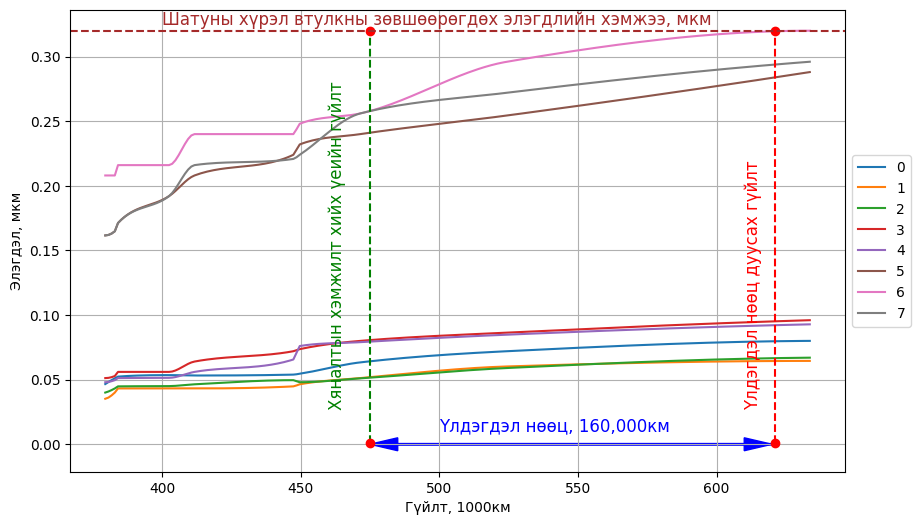

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

# Original data
data = """
330  0.029109  0.022  0.025  0.032  0.03  0.101  0.13  0.101
333  0.031912  0.025  0.027  0.033  0.031  0.103  0.13  0.103
334  0.032723  0.027  0.028  0.035  0.032  0.107  0.135  0.107
350  0.033438  0.027  0.028125  0.035  0.032125  0.12  0.135  0.12
358  0.033252  0.027  0.029  0.04  0.035  0.13  0.15  0.135
389  0.033688  0.028  0.031  0.045  0.041  0.14  0.15  0.138
391  0.034112  0.029  0.03  0.046  0.0475  0.145  0.155  0.14
410  0.0396  0.032008  0.031875  0.05  0.049375  0.15  0.16  0.16
456  0.045  0.037625  0.036875  0.054  0.053  0.159  0.185  0.17
551  0.05  0.040313  0.041875  0.06  0.058  0.18  0.2  0.185
"""

# Splitting the data into lines and then into columns
lines = data.strip().split('\n')
columns = [line.split() for line in lines]
columns = [[float(val) for val in col] for col in columns]

# Creating arrays for x and y values
x_values = np.arange(330, 552, 1)
interpolated_values = np.zeros((len(x_values), len(columns[0]) - 1))

# Interpolating each column using Pchip interpolation
for i in range(1, len(columns[0])):
    f = PchipInterpolator([col[0] for col in columns], [col[i] for col in columns])
    interpolated_values[:, i - 1] = f(x_values)

data_x = x_values
data_y = interpolated_values[:,5]

# Horizontal line
y_value = 0.32
intercept_x = np.interp(y_value, data_y, data_x)

# Plotting each column
plt.figure(figsize=(10, 6))
for i in range(len(columns[0]) - 1):
    plt.plot(x_values*1.15, interpolated_values[:, i]*1.6, label=i)
print(intercept_x)
print(min(data_y))
plt.plot([intercept_x+70, intercept_x+70], [min(data_y)-.1, y_value], linestyle="--", color='red')
plt.plot([intercept_x+70, intercept_x+70], [min(data_y)-.1, y_value], 'ro')
plt.plot([475, 475], [min(data_y)-.1, y_value], linestyle="--", color='green')
plt.plot([475, 475], [min(data_y)-.1, y_value], 'ro')
plt.text(460, 0.03, 'Хяналтын хэмжилт хийх үеийн гүйлт', fontsize=12, color='green', rotation='vertical')
plt.text(610, 0.03, 'Үлдэгдэл нөөц дуусах гүйлт', fontsize=12, color='red', rotation='vertical')
plt.text(500, 0.01, 'Үлдэгдэл нөөц, 160,000км', fontsize=12, color='blue')
plt.text(400, 0.325, 'Шатуны хүрэл втулкны зөвшөөрөгдөх элэгдлийн хэмжээ, мкм', fontsize=12, color='brown')
plt.axhline(y=y_value, color='brown', linestyle='--')
plt.arrow(480, 0.0, 130, 0.0, head_width=0.01, head_length=10, fc='blue', ec='blue')
plt.arrow(620, 0, -135, 0, head_width=0.01, head_length=10, fc='blue', ec='blue')
plt.xlabel('Гүйлт, 1000км')
plt.ylabel('Элэгдэл, мкм')
#plt.title('Хөдөлгүүрийн эд ангиудын элэгдлийн хэмжилт')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.interpolate import PchipInterpolator

# Original data
data = """
330  0.025109  0.022  0.025  0.032  0.03  0.101  0.13  0.101
333  0.031912  0.025  0.027  0.033  0.031  0.103  0.13  0.103
334  0.032723  0.027  0.028  0.035  0.032  0.107  0.135  0.107
350  0.033438  0.027  0.028125  0.035  0.032125  0.12  0.135  0.12
358  0.033252  0.027  0.029  0.04  0.035  0.13  0.15  0.135
389  0.033688  0.028  0.031  0.045  0.041  0.14  0.15  0.138
391  0.034112  0.029  0.03  0.046  0.0475  0.145  0.155  0.14
410  0.0396  0.032008  0.031875  0.05  0.049375  0.15  0.16  0.16
456  0.045  0.037625  0.036875  0.054  0.053  0.159  0.185  0.17
551  0.05  0.040313  0.041875  0.06  0.058  0.18  0.2  0.185
"""

# Splitting the data into lines and then into columns
lines = data.strip().split('\n')
columns = [line.split() for line in lines]
columns = [[float(val) for val in col] for col in columns]

# Extracting x and y values
x_values = np.array([col[0] for col in columns])
y_values = np.array([col[1:] for col in columns])

# Ensuring monotonicity in y-values
for i in range(y_values.shape[1]):
    y_values[:, i] = np.maximum.accumulate(y_values[:, i])

# Interpolating each column using Pchip interpolation
interpolated_functions = [PchipInterpolator(x_values, y_values[:, i], extrapolate=True) for i in range(y_values.shape[1])]

# Predicting the next 450 steps
next_x_values = np.arange(x_values[-1] + 1, x_values[-1] + 451, 1)
predicted_values = np.zeros((len(next_x_values), len(interpolated_functions) + 1))
predicted_values[:, 0] = next_x_values

for i, f in enumerate(interpolated_functions):
    predicted_values[:, i + 1] = f(next_x_values)

# Saving the predicted values to a CSV file
np.savetxt('predicted_values.csv', predicted_values, delimiter=',', fmt='%.6f', header='x,y1,y2,y3,y4,y5,y6,y7,y8', comments='')

print("Predicted values saved to predicted_values.csv")
